In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14



# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
divisor = 5
sample_freq = (62.5 / divisor) * u.MHz 
dt = (1 / sample_freq).to(u.ns)

N_samples = 16000

# sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

# freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [3]:
freqs_to_test = np.arange(.1,1.1,.1) * sample_freq

In [16]:
raw_data = np.loadtxt('lab1part3_2_version4.csv',delimiter = ',',unpack=True, dtype = np.int16)
data = (((raw_data / (1.0 * np.iinfo(raw_data[0][0].dtype).max))) * u.V).to(u.mV)

In [19]:
np.unique(raw_data[0])/ 256

array([-64., -63., -62., -59., -58., -55., -54., -53., -50., -49., -48.,
       -43., -42., -41., -33., -32., -31., -25., -24., -23., -22., -17.,
       -16., -15., -14.,  -7.,  -6.,  -5.,  -4.,   5.,   6.,   7.,  15.,
        16.,  17.,  23.,  24.,  25.,  32.,  33.,  34.,  42.,  43.,  48.,
        49.,  50.,  54.,  55.,  58.,  59.,  62.,  63.,  64.])

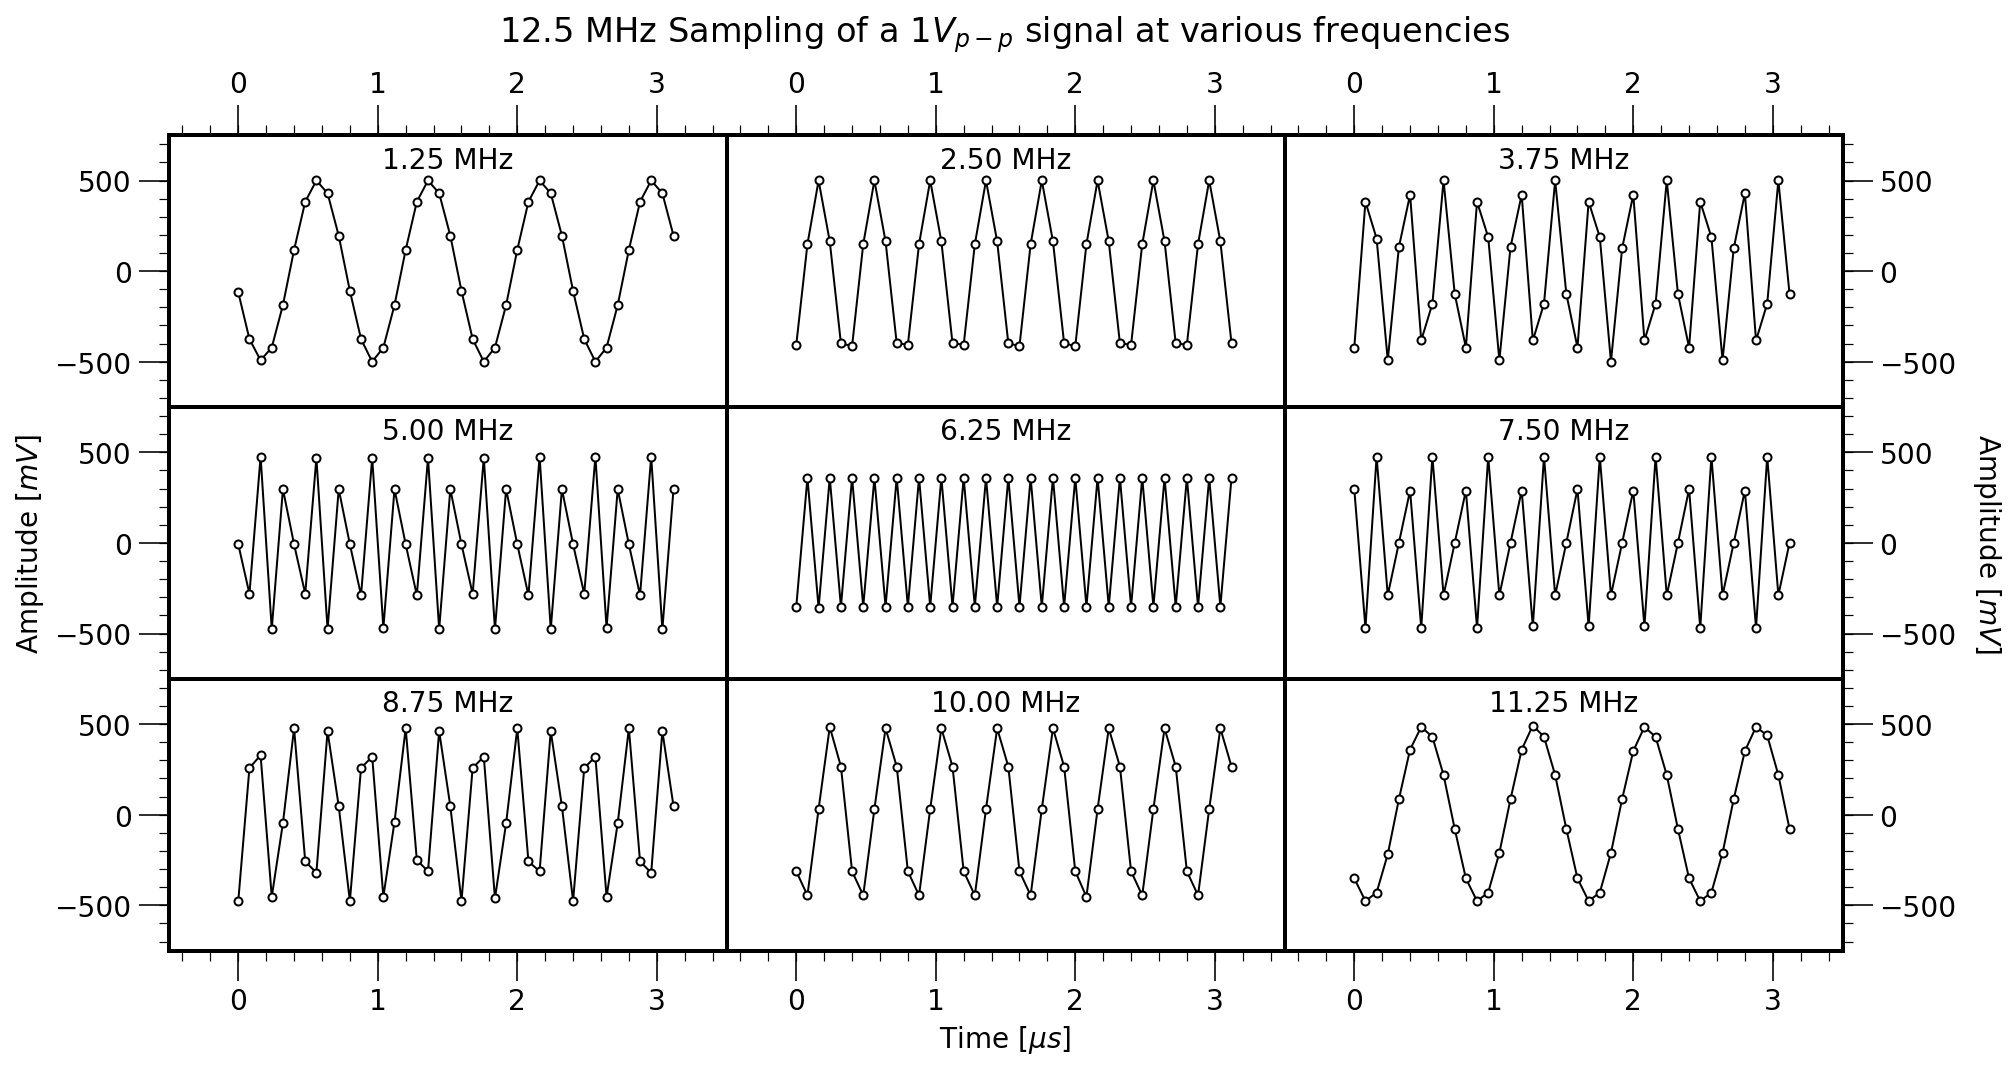

In [10]:
# Plot
fig, axes = plt.subplots(3,3, figsize = (15,7.5))
    
for i, ax in enumerate(axes.reshape(-1)):

     

    ax.plot(times[0:40 ],
            data[i][40:80],
            color = 'black',
#             label = '%.2f MHz' %freqs_to_test[i].value,
            marker='o',
            markerfacecolor='white',
            markersize = 4,
            linewidth = 1)
    
    ax.text(0.5, 0.91,
            '%.2f MHz' %freqs_to_test[i].value,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes),
    
#     ax.legend(loc = 'lower center',  borderpad = 0.4, framealpha = 1, bbox_to_anchor = (0.5, -.025))
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlim(-.5, 3.5)
    ax.set_ylim(-750, 750)
    
    
    if (i % 3) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(500))
        ax.yaxis.set_minor_locator(MultipleLocator(100)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
    if ((i - 2) % 3) == 0:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(500))
        ax_right.yaxis.set_minor_locator(MultipleLocator(100)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        
    if i < 3:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.xaxis.set_major_locator(MultipleLocator(1))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.2))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
    
    if i > 5:

        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.xaxis.set_minor_locator(MultipleLocator(0.2))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 3:
        ax.set_ylabel(r'Amplitude $[mV]$')
    
    if i == 5:
        ax.set_ylabel(r'Amplitude $[mV]$', rotation = 270, labelpad = 80)
        ax.yaxis.set_label_position('right')
    if i == 7:
        ax.set_xlabel(r'Time $[\mu s]$')
    
    if i == 1:
        ax.set_title(r'$12.5$ MHz Sampling of a $1 V_{p-p}$ signal at various frequencies ', y = 1.3)

plt.subplots_adjust(hspace=0, wspace = 0)
plt.show()
fig.savefig('time_series_3_2.pdf', dpi = 'figure', format = 'pdf', transparent = True)

In [11]:
PF_data = np.loadtxt('lab1part3_2_PF_version2.csv', delimiter = ',')

In [12]:
dft_samples = 2**7
delta_nu = (1 / (dft_samples * dt.to(u.s))).to(u.MHz) # Freq per dft bin
dft_f_range = delta_nu.value * (np.arange(0,dft_samples) - dft_samples/2)

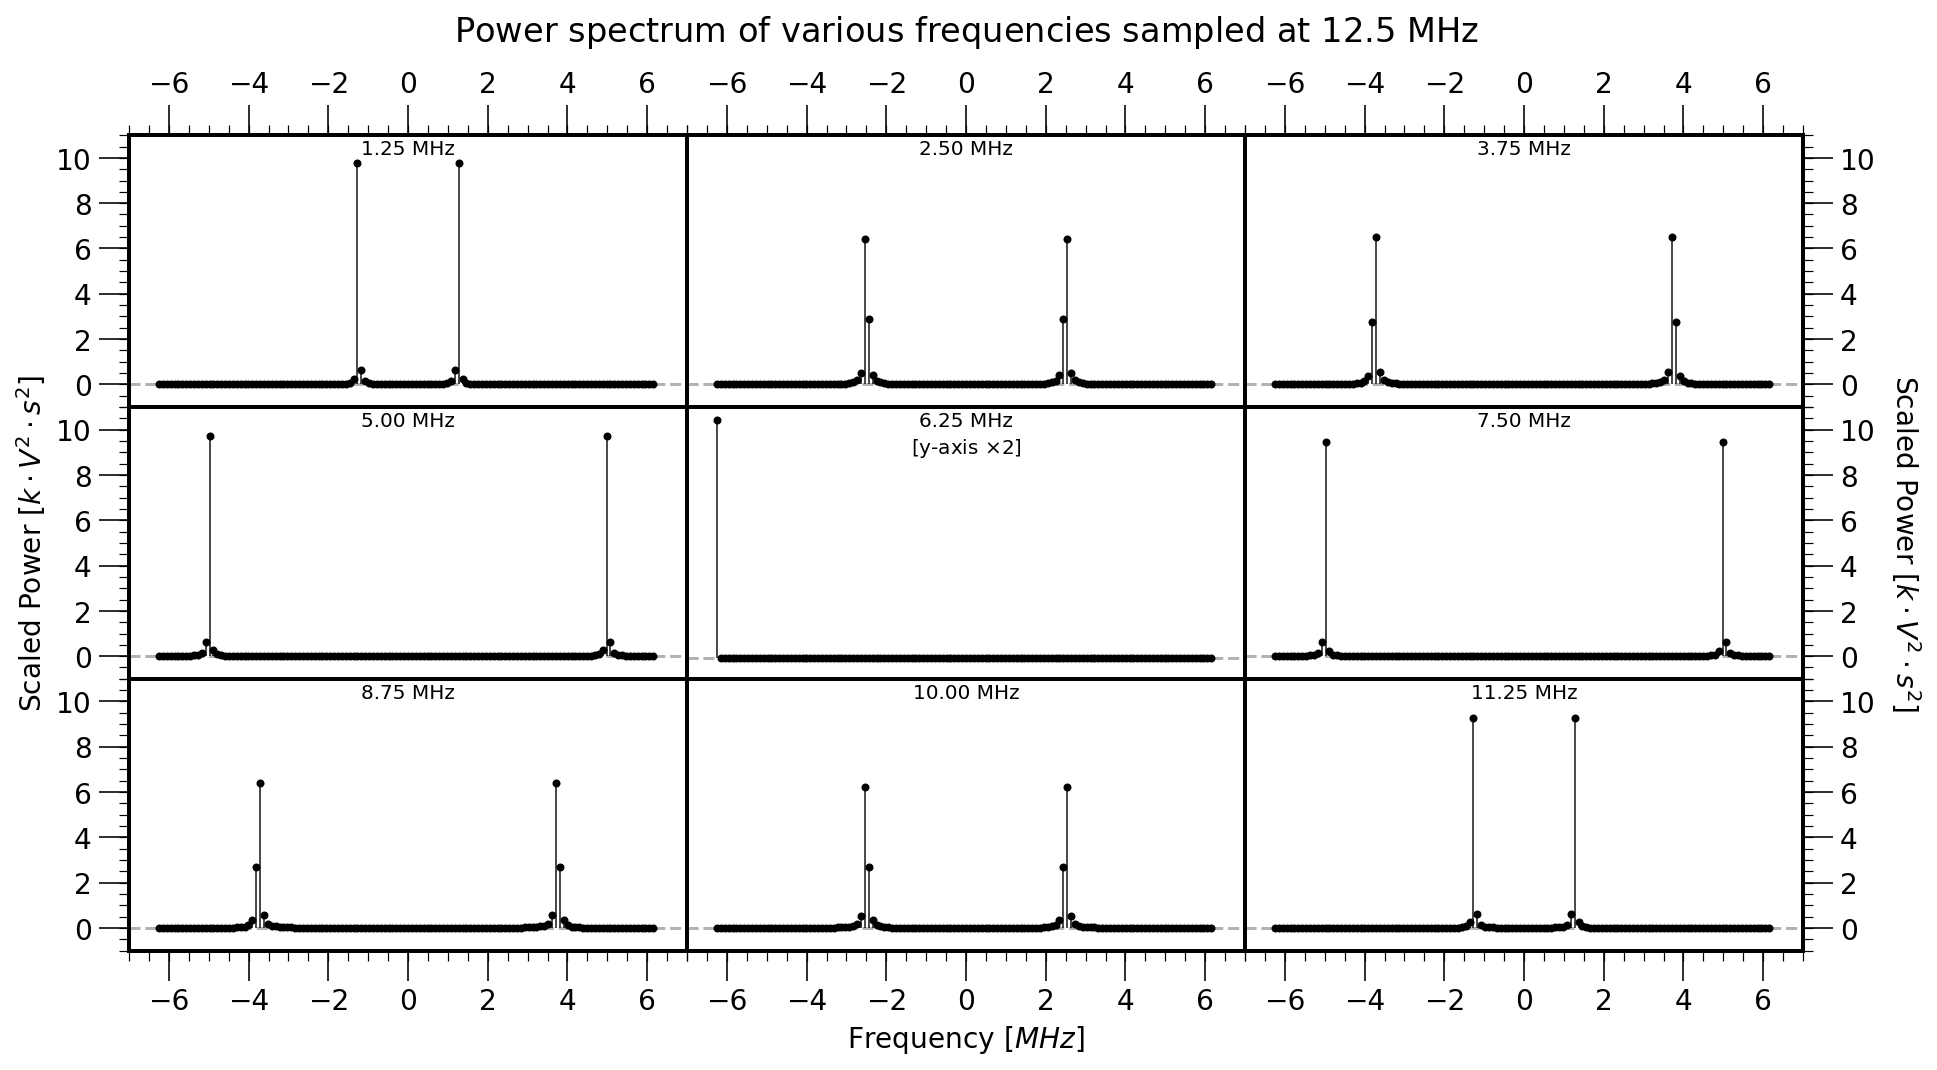

In [18]:
fig, axes = plt.subplots(3,3, figsize = (15, 7.5))

# to remove the 1e9 or 1e8 from plots
PLOT_SCALE = 1e8 / 1.1

for i , ax in enumerate(axes.reshape(-1)):
    
    # plot points
    ax.plot(dft_f_range,
            PF_data[i] / PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'black',
            markerfacecolor='black',
            markersize = 3)    
    
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)
    
    ax.vlines(dft_f_range,
              ymin = 0,
              ymax = PF_data[i] / PLOT_SCALE,
              color = 'black',
              alpha = 0.7,
              linewidth = 1)

    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 
    ax.set_xlim(-7, 7)
    ax.set_ylim(-1,11)


    ax.text(0.5, 0.95,
            '%.2f MHz' %freqs_to_test[i].value,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize = 10)
    if i == 4:
        ax.set_ylim(-2,24)
        ax.text(0.5, 0.85,
                r'[y-axis $\times2$]',
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes, fontsize = 10)

    
    # set ticks for left side of plotgrid
    if (i % 3) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    # set ticks for right side of plotgrid
    if ((i - 2) % 3) == 0:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(2))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
    
    # set ticks for top side of plotgrid
    if i < 3:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-6,7))
        ax_top.xaxis.set_major_locator(MultipleLocator(2))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.5))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
    
    # set ticks for bottom side of plotgrid
    if i > 5:

        ax.set_xticks(np.arange(-6,7))
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 3:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')
    
    if i == 5:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 60)
        ax.yaxis.set_label_position('right')
        
    if i == 7:
        ax.set_xlabel(r'Frequency $[MHz]$')
    
    if i == 1:
        ax.set_title(r'Power spectrum of various frequencies sampled at $12.5$ MHz', y = 1.3)

plt.subplots_adjust(hspace=0, wspace = 0)        
plt.show()
fig.savefig('power_spectrum_3_2.pdf', dpi = 'figure', format = 'pdf', transparent = True)